# Installing Dependencies

In [ ]:
%pip install tensorflow opencv-python matplotlib

In [ ]:
%pip list

In [4]:
import tensorflow as tf
import os

### Cleaning Data

In [11]:
import cv2
import imghdr

In [12]:
data_dir = 'data'
exts = ['jpeg','jpg','bmp','png']

In [15]:
for image in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir,image)):
        path = os.path.join(data_dir,image,img)
        try:
            tip = imghdr.what(path)
            if tip not in exts:
                print("Img doesnt exist")
                os.remove(path)
        except:
            print("Exception") 

## Load Data

In [ ]:
tf.data.Dataset??

In [91]:
import numpy as np
from matplotlib import pyplot as plt

In [61]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 178 files belonging to 2 classes.


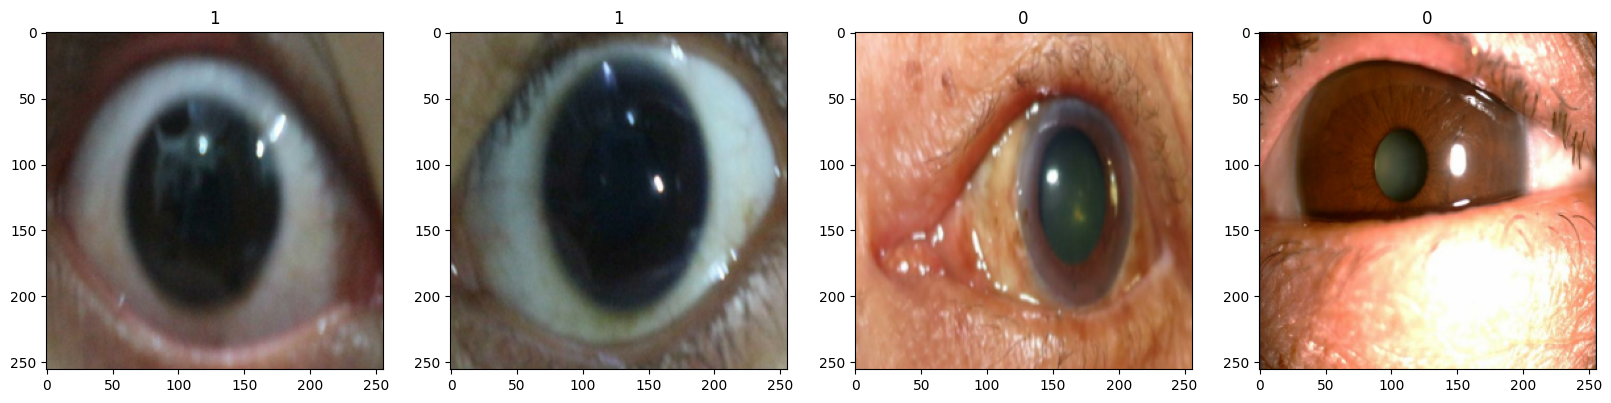

In [40]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 0 immature
# 1 normal

# Preprocess Data

In [62]:
data = data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

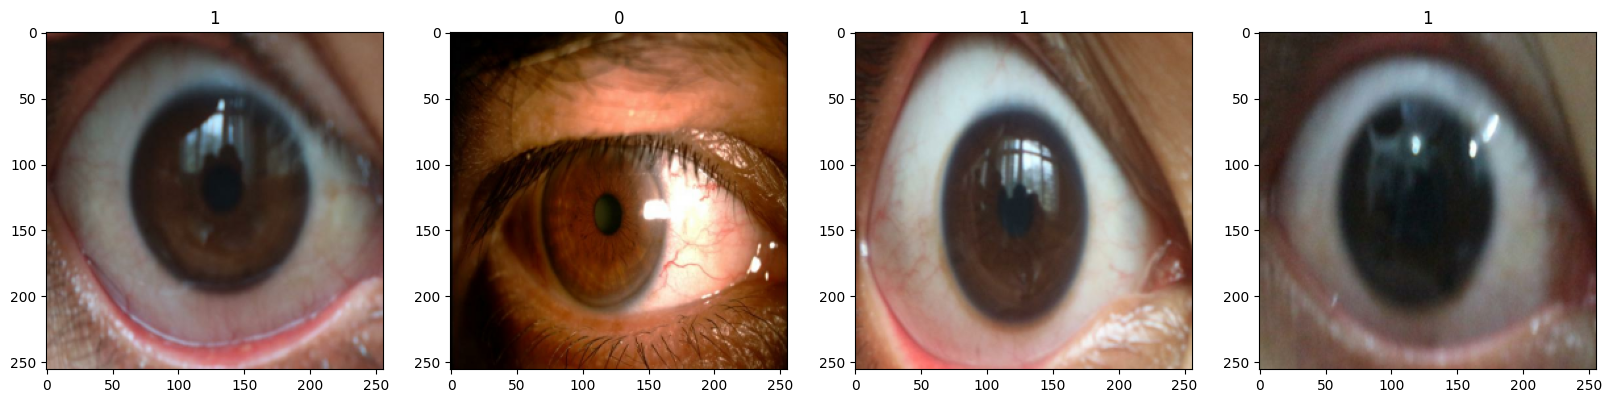

In [43]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [63]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [64]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [66]:
model = Sequential()

In [69]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [73]:
logdir='logs'
tensoboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [74]:
history = model.fit(train,epochs=20,validation_data=val,callbacks=[tensoboard_callback])

Epoch 1/20


4/4 [==============================] - 4s 408ms/step - loss: 0.6876 - accuracy: 0.5312 - val_loss: 0.7065 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 1s 297ms/step - loss: 0.6819 - accuracy: 0.5000 - val_loss: 0.6543 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 1s 295ms/step - loss: 0.6518 - accuracy: 0.5625 - val_loss: 0.6208 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 1s 302ms/step - loss: 0.5909 - accuracy: 0.8203 - val_loss: 0.5386 - val_accuracy: 0.8438
Epoch 5/20
4/4 [==============================] - 1s 277ms/step - loss: 0.4911 - accuracy: 0.8125 - val_loss: 0.4760 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 1s 276ms/step - loss: 0.3619 - accuracy: 0.8750 - val_loss: 0.2963 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 1s 277ms/step - loss: 0.2431 - accuracy: 0.8906 - val_loss: 0.2286 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==

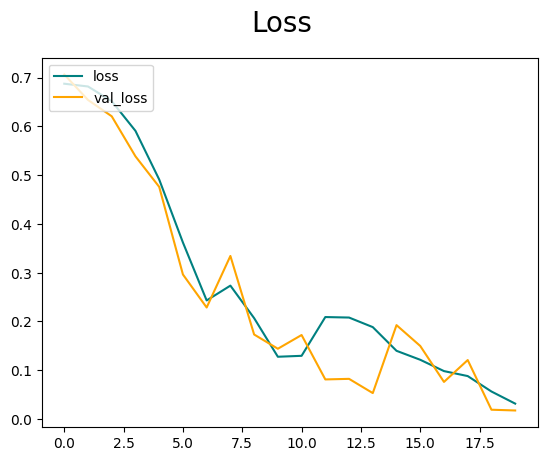

In [76]:
fig2 = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig2.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

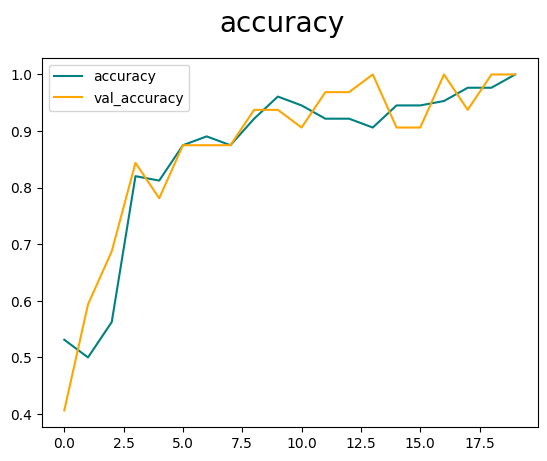

In [77]:
fig2 = plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig2.suptitle('accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluation

In [78]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [79]:
prec = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [81]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    prec.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 338ms/step


In [83]:
print(f'Precision:{prec.result().numpy()}, Recall:{rec.result().numpy()}, Accuray:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuray:1.0


In [ ]:
import cv2

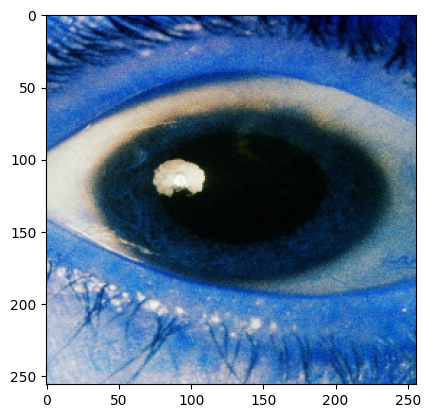

In [124]:
img = cv2.imread('./test/norm.jpg')
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [125]:
yhat = model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat > 0.5 :
    print("Normal")
else:
    print("Cataract")

1/1 [==============================] - 0s 22ms/step
[[0.9999244]]
Normal


# Saving Model

In [120]:
from tensorflow.keras.models import load_model

In [121]:
model.save(os.path.join('models','v1model.h5'))

d:\Tensorflow\clasification\clenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [122]:
new = load_model(os.path.join('models','v1model.h5'))

In [123]:
yhat = new.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat > 0.5 :
    print("Normal")
else:
    print("Cataract")

1/1 [==============================] - 0s 80ms/step
[[0.9999244]]
Normal
